In [79]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt
import logging

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
df = pd.read_feather(config.processed_data_path + "/whole_year/whole_year.feather")
df["loud"] = df["broadband_spl"] > (df["background_spl"] + 10)
df

,timestamp,broadband_spl,background_spl,loud
0,2018-08-02 00:08:03.500,-57.607837,-56.670380,False
1,2018-08-02 00:08:04.000,-57.849402,-56.669828,False
2,2018-08-02 00:08:04.500,-58.041780,-56.669340,False
3,2018-08-02 00:08:05.000,-57.718385,-56.668625,False
4,2018-08-02 00:08:05.500,-57.395894,-56.667946,False
...,...,...,...,...
30048620,2019-05-31 22:57:28.007,-55.031424,-63.653202,False
30048621,2019-05-31 22:57:28.507,-49.616213,-63.635780,True
30048622,2019-05-31 22:57:29.007,-49.719039,-63.618844,True
30048623,2019-05-31 22:57:29.507,-48.590468,-63.600810,True


In [81]:
df["loud"].sum()/len(df) * 100

4.0844431317572765

In [82]:
transients_df = pd.read_feather(config.processed_data_path + "/transient_timestamps_and_durations/whole_year.feather")
durations = transients_df["duration"].values
durations

array([ 0.5,  0.5,  0.5, ...,  2. , 28.5,  2. ])

In [83]:
np.max(durations)/60

7.541666666666667

In [84]:
np.std(durations)

5.956026914553165

In [85]:
transients_df[transients_df["duration"] > 5].sort_values(["duration"], ascending=False).head(50)

,timestamp,broadband_spl,background_spl,duration
13129,2018-09-05 00:50:50.500,-32.947084,-43.800093,452.5
377037,2019-05-16 16:43:57.007,-21.406829,-31.787782,420.0
2033,2018-08-06 16:15:55.500,-41.520484,-51.520948,389.0
4416,2018-08-11 16:17:16.500,-43.005158,-53.058475,348.5
16128,2018-09-23 10:26:22.000,-5.688670,-15.946035,331.0
11143,2018-08-31 07:01:19.000,-46.982676,-57.002315,323.0
11177,2018-08-31 12:52:09.500,-50.239350,-60.577106,319.0
3872,2018-08-09 15:51:30.500,-43.141583,-53.445794,316.5
1654,2018-08-06 07:42:54.500,-42.003788,-56.401869,312.5
376990,2019-05-16 14:58:22.007,-22.005385,-38.375865,303.5


In [86]:
transients_df[transients_df["duration"] > 3*60].groupby(pd.Grouper(key="timestamp", freq="1M")).size()

timestamp
2018-08-31    43
2018-09-30    15
2018-10-31     0
2018-11-30     0
2018-12-31     0
2019-01-31     0
2019-02-28     0
2019-03-31     0
2019-04-30     0
2019-05-31     4
Freq: M, dtype: int64

In [87]:
df[(df["timestamp"].dt.month == 8) & (df["duration"] > 3*60)]

KeyError: 'duration'

In [92]:
ice_data = pd.read_csv(config.external_data_path + "/hazel_ice_data.csv")
ice_data

,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
0,27/08/2018,0.0,NaN,NaN,NaN,NaN,0.000000
1,03/09/2018,0.0,no ice info,no ice info,4.9,3.3,-0.036379
2,10/09/2018,0.0,no ice info,no ice info,1.0,1.8,-0.038345
3,17/09/2018,0.0,no ice info,no ice info,-2.5,0.1,-0.040294
4,24/09/2018,0.0,no ice info,no ice info,-4.4,-2.0,-0.029977
5,01/10/2018,0.1,no ice info,no ice info,-4.9,-4.4,-0.029508
6,08/10/2018,0.7,New Ice,no ice info,-7.7,-7.1,-0.028988
7,15/10/2018,0.3,New Ice,Fast ice,-9.8,-10.0,0.052866
8,22/10/2018,0.9,Grey Ice,Fast ice,-14.0,-12.7,0.238501
9,05/11/2018,0.9,Grey Ice,Fast ice,-10.5,-17.2,0.400979


In [88]:
daily_temp_df = pd.read_feather(config.processed_data_path + '/daily_temperature_cambay_shorestation.feather')
daily_temp_df[daily_temp_df["timestamp"].dt.month==10].min()

timestamp           2018-10-01 00:00:00
mean_temperature             -18.493031
dtype: object

In [89]:
short_med_trans_df = transients_df[(transients_df["duration"] > 0.5) & (transients_df["duration"] <= 5)]
short_med_trans_df

,timestamp,broadband_spl,background_spl,duration
3,2018-08-02 00:23:13.000,-48.039116,-59.874419,1.0
5,2018-08-02 00:25:19.500,-44.184214,-54.403000,2.5
8,2018-08-02 00:25:44.000,-42.822832,-53.617516,1.5
9,2018-08-02 00:25:47.500,-41.966867,-53.525806,1.5
17,2018-08-02 03:32:30.000,-59.539824,-69.709146,1.0
...,...,...,...,...
412293,2019-05-31 22:43:41.385,-55.357006,-66.311047,1.0
412294,2019-05-31 22:43:47.385,-55.014128,-66.155460,4.0
412296,2019-05-31 22:44:43.885,-53.916397,-65.493901,2.5
412307,2019-05-31 22:56:58.507,-52.946478,-64.694019,2.0


<AxesSubplot:xlabel='timestamp'>

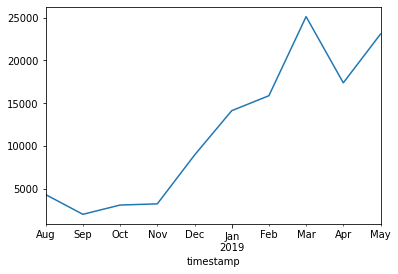

In [90]:
short_med_trans_df.groupby(pd.Grouper(key="timestamp", freq="1M")).size().plot()

In [114]:
monthly_temp_df = daily_temp_df.groupby(pd.Grouper(key="timestamp", freq="1M")).mean()
monthly_temp_df

,mean_temperature
timestamp,
2018-08-31,5.064153
2018-09-30,-1.536490
2018-10-31,-9.829635
2018-11-30,-23.507895
2018-12-31,-25.798470
2019-01-31,-32.634603
2019-02-28,-31.187946
2019-03-31,-22.416413
2019-04-30,-22.588230


In [115]:
monthly_temp_df["monthly_temp_diff"] = monthly_temp_df["mean_temperature"] - monthly_temp_df["mean_temperature"].shift(periods=1, fill_value=0) 
monthly_temp_df

,mean_temperature,monthly_temp_diff
timestamp,,
2018-08-31,5.064153,5.064153
2018-09-30,-1.536490,-6.600643
2018-10-31,-9.829635,-8.293145
2018-11-30,-23.507895,-13.678260
2018-12-31,-25.798470,-2.290575
2019-01-31,-32.634603,-6.836133
2019-02-28,-31.187946,1.446657
2019-03-31,-22.416413,8.771533
2019-04-30,-22.588230,-0.171817
